In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

In [2]:
TrueOS = 0
TrueOG = 200

PS = 0.5225
PG = 0.9075

PS = 0.3895809739524349
PG = 0.9388040455512918

PSGuess = 0.5225
PGGuess = 0.905

CS = np.random.binomial(n=TrueOS, p=PS, size = 10000000) + np.random.binomial(n=TrueOG, p=(1-PG), size = 10000000)
CG = -1*CS + TrueOS + TrueOG

In [3]:
AproxOS = np.round_(((CS+CG)*(1-PGGuess) - CS) / (1-PSGuess-PGGuess))
AproxOS = np.clip(AproxOS, 0, TrueOS+TrueOG)

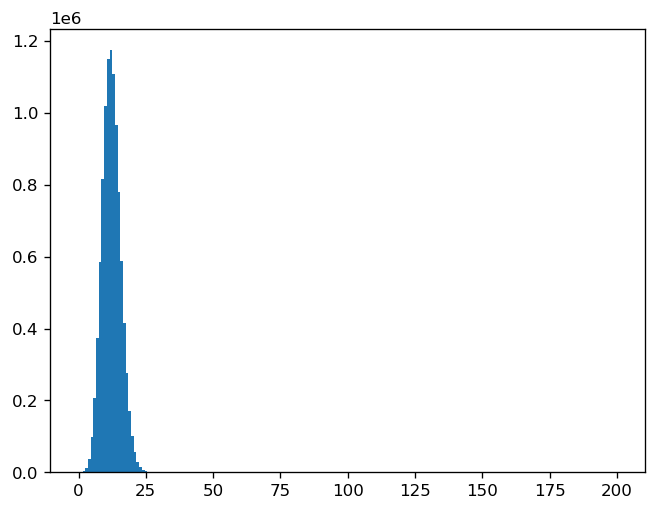

In [4]:
plt.figure(dpi = 120)
plt.hist(CS, bins = np.linspace(-0.5, TrueOS+TrueOG+0.5, TrueOS+TrueOG + 2))
plt.show()

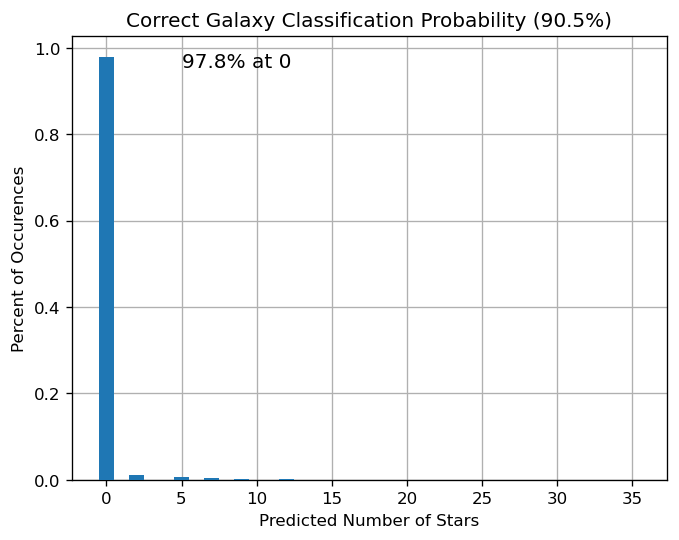

In [5]:
plt.figure(dpi = 120)
plt.hist(AproxOS, bins = np.linspace(-0.5, np.max(AproxOS)+0.5, np.max(AproxOS.astype(int)) + 2), zorder = 3, density = True)
# plt.axvline(x=TrueOS, linestyle = '--', color = 'red', linewidth = 2)
plt.grid(zorder = 0)
plt.text(5, (round(100 * len(np.where(AproxOS == 0)[0]) / len(AproxOS), 0) - 2.5) / 100, str(round(100 * len(np.where(AproxOS == 0)[0]) / len(AproxOS), 1)) + '% at 0', fontsize = 12)
plt.xlabel('Predicted Number of Stars')
plt.ylabel('Percent of Occurences')
plt.title('Correct Galaxy Classification Probability (90.5%)')
plt.show()

In [6]:
len(np.where(AproxOS == 0)[0])

9784296

In [7]:
len(np.where(CS <= 10)[0])

3154958

In [8]:
np.average(AproxOS)

0.1007157

In [9]:
np.median(AproxOS)

0.0

In [10]:
len(np.where(AproxOS == 0)[0]) / len(AproxOS)

0.9784296

In [11]:
np.median(CS)

12.0

# Validating Maximum Likelihood

In [12]:
CS_ = 99
CG_ = 51

PS_ = 0.66
PG_ = 0.86

In [13]:
likelihoods = []
for OS in np.arange(CS_ + CG_ + 1):
    OG = CS_ + CG_ - OS
    likelihoods.append(len(np.where(np.random.binomial(n=OS, p=PS_, size = 1000000) + np.random.binomial(n=OG, p=(1-PG_), size = 1000000) == CS_)[0]) / 1000000)

In [14]:
likelihoods[-5:]

[0.065793, 0.066924, 0.067288, 0.068712, 0.068208]

In [15]:
likelihoods = []
for OS in np.arange(CS_ + CG_ + 1):
    # Now loop over number of classified stars actually coming from the observed stars
    OG = CS_ + CG_ - OS
    CSFOS = np.max([CS_ - OG, 0])
    sumProb = 0
    while (CSFOS <= OS) & (CSFOS <= CS_):
        sumProb += binom(OS, CSFOS) * (PS_**(CSFOS)) * ((1-PS_)**(OS-CSFOS)) * binom(OG, CS_ - CSFOS) * (PG_**(OG - CS_ + CSFOS)) * ((1-PG_)**(CS_-CSFOS))
        CSFOS += 1
    likelihoods.append(sumProb)

In [16]:
likelihoods[-5:]

[0.0653364359773662,
 0.06697127641319345,
 0.06807577513367197,
 0.06863080539419036,
 0.06863080539419035]